In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-screenplay-movies-1995-2024-gross-income/Original-Screenplay-Movies.csv


### Exploring the Original Screenplay Movies Dataset: 1995-2024

In [2]:
df = pd.read_csv('/kaggle/input/original-screenplay-movies-1995-2024-gross-income/Original-Screenplay-Movies.csv', parse_dates=['Released Date'])

df.head()

,Movie Name,Released Date,Genre,MPAA Rating,Year Gross,Tickets Sold
0,Toy Story,1995-11-22,Adventure,G,"$150,004,917","34,483,888"
1,Ace Ventura: When Nature Calls,1995-11-10,Comedy,PG-13,"$104,371,496","23,993,447"
2,Crimson Tide,1995-05-12,Action,R,"$91,387,195","21,008,550"
3,Waterworld,1995-07-28,Action,PG-13,"$88,246,220","20,286,487"
4,Se7en,1995-09-22,Thriller/Suspense,R,"$87,113,775","20,026,155"


### Top ten movies at the box office

We will check which are the 10 movies that have earned the most at the box office. We can do this by sorting movies by their Tickets sold.

In [3]:
# Remove commas from "Tickets Sold" column
df['Tickets Sold'] = df['Tickets Sold'].str.replace(',', '')

# Convert the "Tickets Sold" column to numeric
df['Tickets Sold'] = pd.to_numeric(df['Tickets Sold'])

In [4]:
ticket_desc = df.sort_values(by='Tickets Sold', ascending=False) 

# Display the top 10 movies 
ticket_desc.head(10)

,Movie Name,Released Date,Genre,MPAA Rating,Year Gross,Tickets Sold
532,Titanic,1997-12-19,Drama,PG-13,"$488,192,879",104092298
5691,Star Wars Ep. VII: The Forc…,2015-12-18,Adventure,PG-13,"$742,208,942",88043765
714,Star Wars Ep. I: The Phanto…,1999-05-19,Adventure,PG,"$430,443,350",84732942
175,Independence Day,1996-07-02,Adventure,PG-13,"$306,169,255",69269062
7790,Top Gun: Maverick,2022-05-27,Action,PG-13,"$718,732,821",68255728
6895,Incredibles 2,2018-09-19,Adventure,PG,"$608,581,744",66803704
2232,Star Wars Ep. III: Revenge …,2005-05-19,Adventure,PG-13,"$380,270,577",59324582
6549,Star Wars Ep. VIII: The Las…,2017-12-15,Adventure,PG-13,"$517,218,368",57660910
1695,Finding Nemo,2003-05-30,Adventure,G,"$339,714,367",56337374
6156,Finding Dory,2016-06-17,Adventure,PG,"$486,295,561",56219140


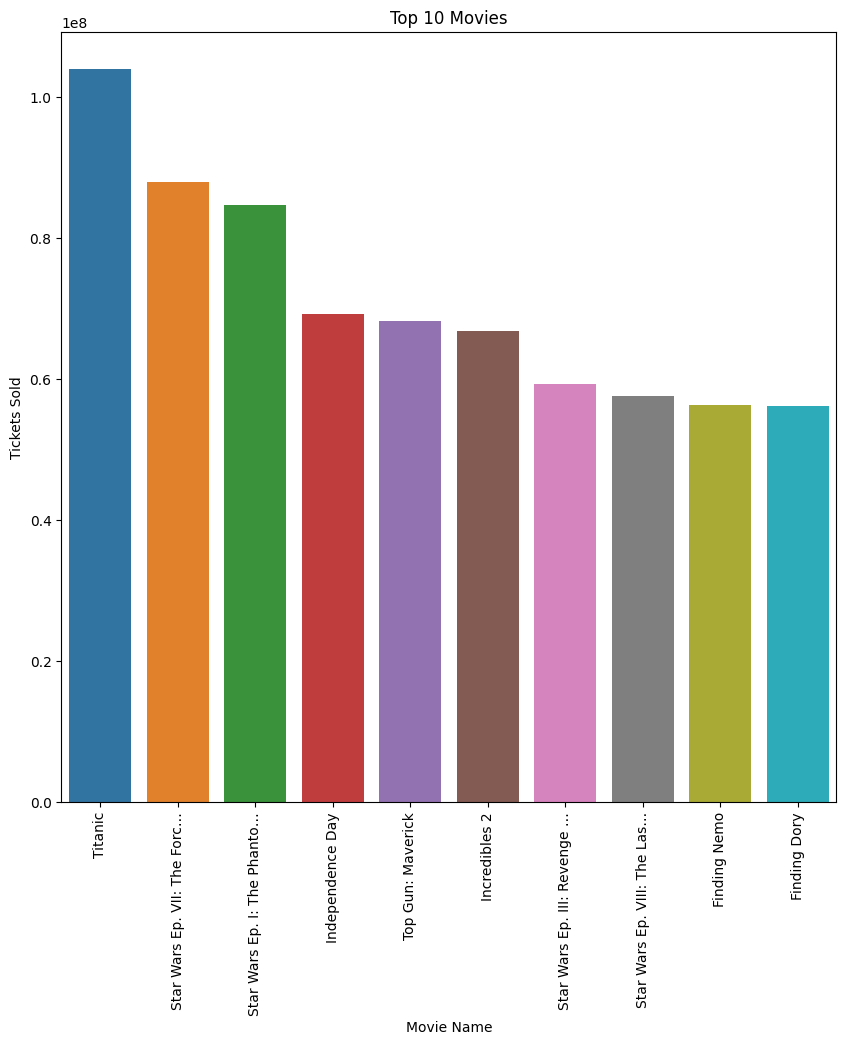

In [5]:
sdf = ticket_desc.head(10)
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(y=sdf['Tickets Sold'], x=sdf['Movie Name'])
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Top 10 Movies')
plt.show()

### Movie genre trend

In [6]:
# Extract year from 'Released Date' and store it in a new column
df['Released Year'] = pd.DatetimeIndex(df['Released Date']).year

In [7]:
# Define a function to extract numeric values from a string
def extract_numeric(string):
    numeric_part = re.search(r'[\d,]+', str(string))  
    if numeric_part:
        return float(numeric_part.group().replace(',', ''))
    else:
        return None  # Return None for non-numeric values or missing data

# Apply the function to 'Year Gross' column
df['Year Gross'] = df['Year Gross'].apply(extract_numeric)


In [8]:
df.dtypes

Movie Name               object
Released Date    datetime64[ns]
Genre                    object
MPAA Rating              object
Year Gross              float64
Tickets Sold              int64
Released Year             int32
dtype: object

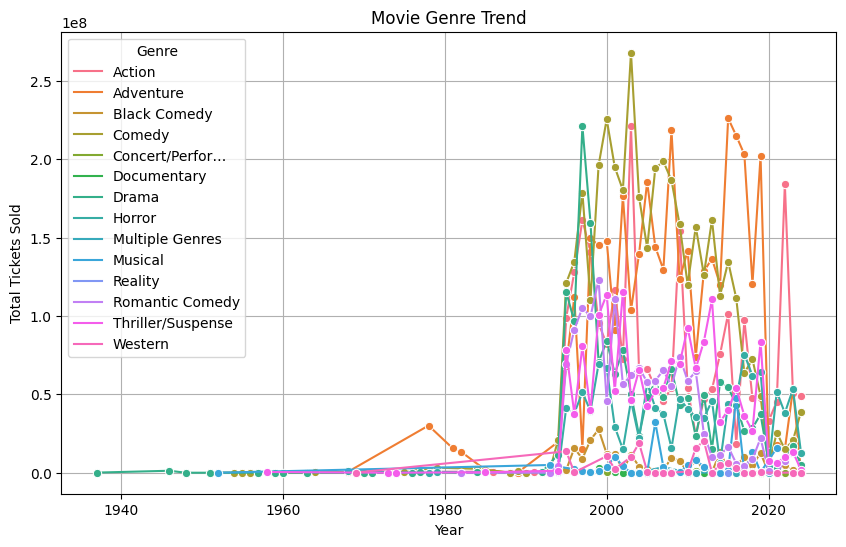

In [9]:
# Group the data by 'Genre' and 'Released Year' and calculate the sum of 'Tickets Sold'
grouped_data = df.groupby(['Genre', 'Released Year'])['Tickets Sold'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Released Year', y='Tickets Sold', hue='Genre', marker='o')
plt.title('Movie Genre Trend')
plt.xlabel('Year')
plt.ylabel('Total Tickets Sold')
plt.legend(title='Genre')
plt.grid(True)
plt.show()
